# Data analysis

## Loading the data

Configuration:

In [476]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols

from ast import literal_eval
from os import listdir
from os.path import join

sns.set_style('darkgrid')
blue, green, red = sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]

Load the csv data files:

In [477]:
data_path = 'data/'

# Participants information and trials
participants = pd.read_csv(join(data_path, 'participants.csv'))
trials = pd.read_csv(join(data_path, 'participants_trials.csv'))

# Participants details
details = []
for file in listdir(data_path):
    if file.endswith('details.csv'): # The trial files end with *-details.csv
        details.append(pd.read_csv(join(data_path, file)))
details = pd.concat(details, ignore_index=True)

# Independent variables
techniques = trials.drop_duplicates('technique_id').loc[:, ['technique_id', 'technique_name']].reset_index(drop=True)
text_size = trials.drop_duplicates('text_size_id').loc[:, ['text_size_id', 'text_size_name']].reset_index(drop=True)
distance = trials.drop_duplicates('distance_id').loc[:, ['distance_id', 'distance_name']].reset_index(drop=True)
techniques.columns = text_size.columns = distance.columns = ['id', 'name']

# Participants rates and preferences (from participants information)
rates, preferences = [], []
rate_labels = participants.loc[:, 'easy_understand':'frustration'].columns.tolist()
for index, participant in participants.iterrows():
    for i in range(len(techniques)):
        row = participant['participant_id':'ordering'].tolist() + [techniques['id'][i]]
        preferences.append(row + [literal_eval(participant['preference'])[i]])
        participant['easy_understand':'frustration'].apply(lambda rate: row.append(literal_eval(rate)[i]))
        rates.append(row)

participant_columns = participants.loc[:, 'participant_id':'ordering'].columns.tolist() + ['technique_id']
rates = pd.DataFrame(rates, columns=participant_columns + rate_labels)
preferences = pd.DataFrame(preferences, columns=participant_columns + ['preference'])

## Analysis of rates and preferences of the participants

Display ratings for each technique first, and for each technique-ordering combination. Participants tested the techniques in this order: (0, 1, 2) with ordering 0, (1, 2, 0) with ordering 1 and (2, 0, 1) with ordering 2.

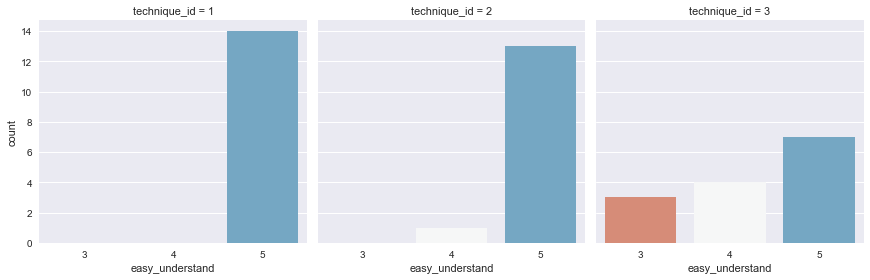

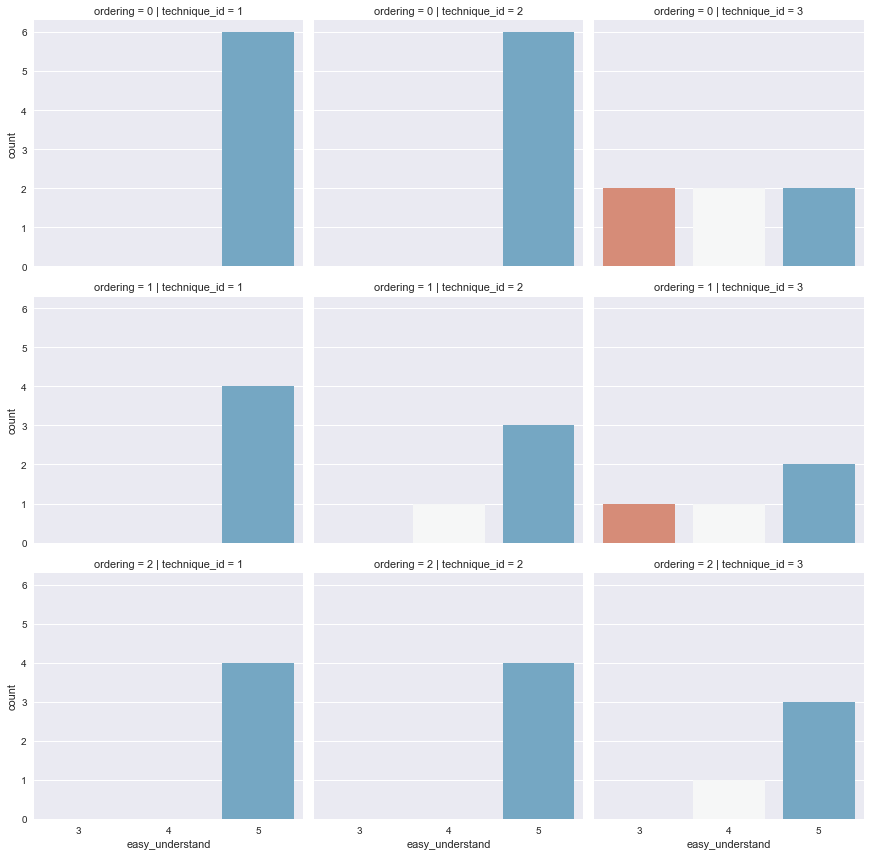

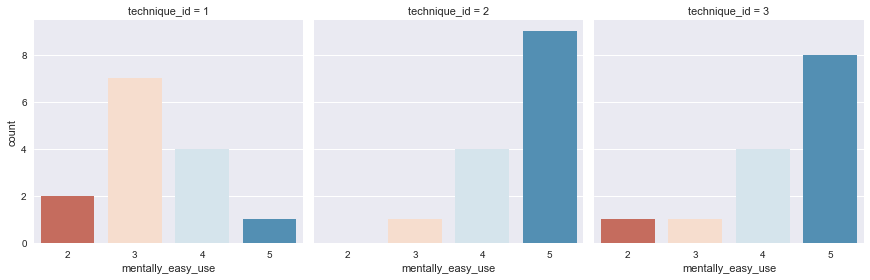

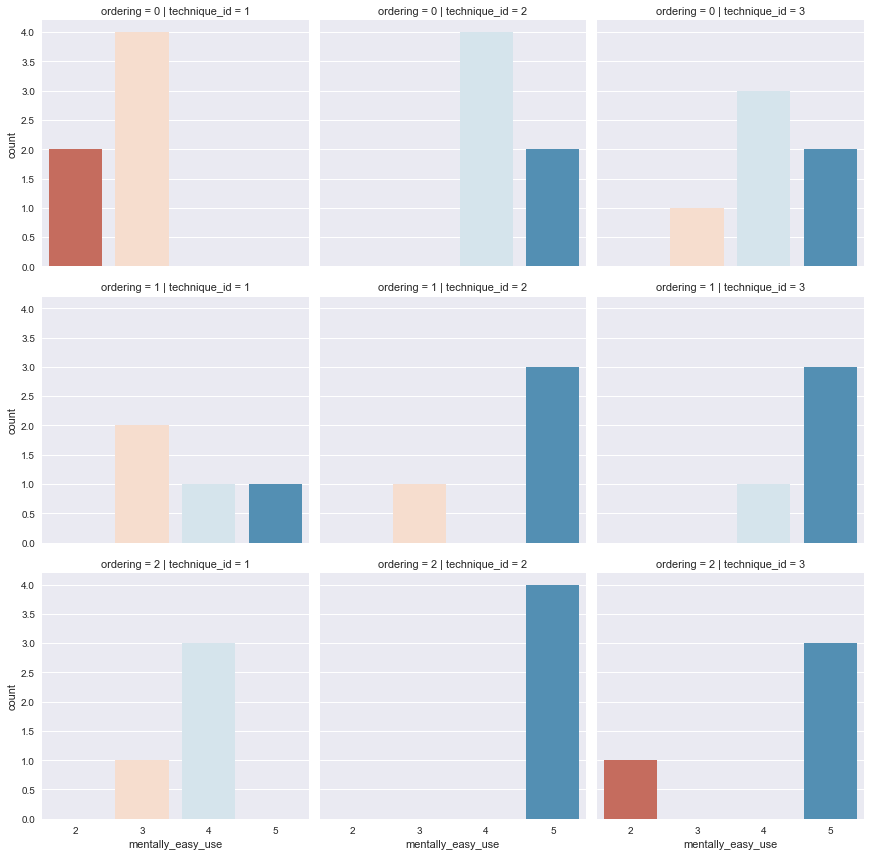

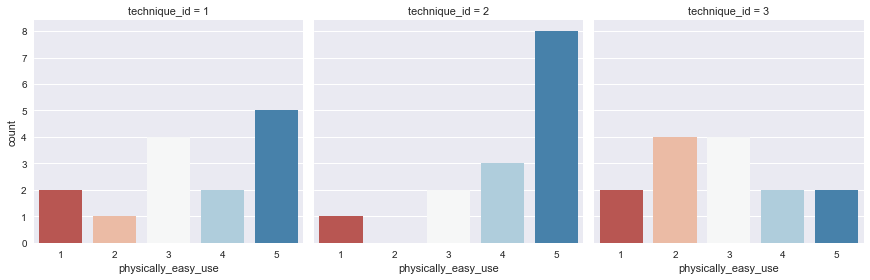

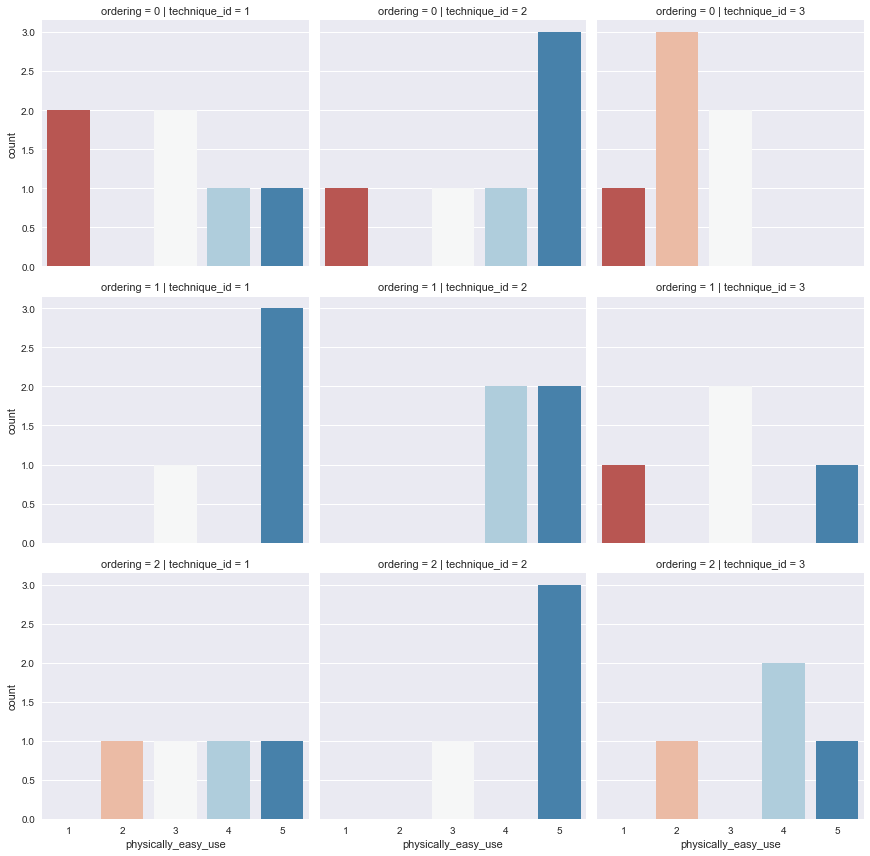

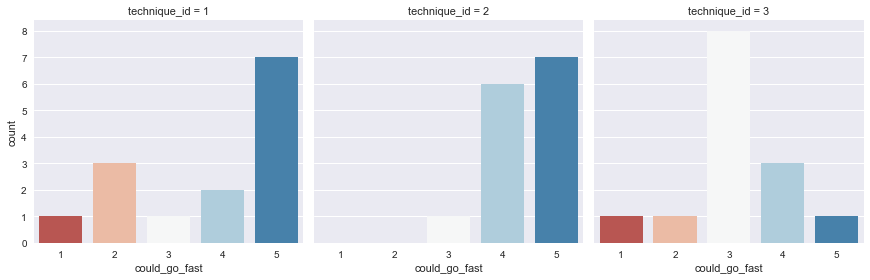

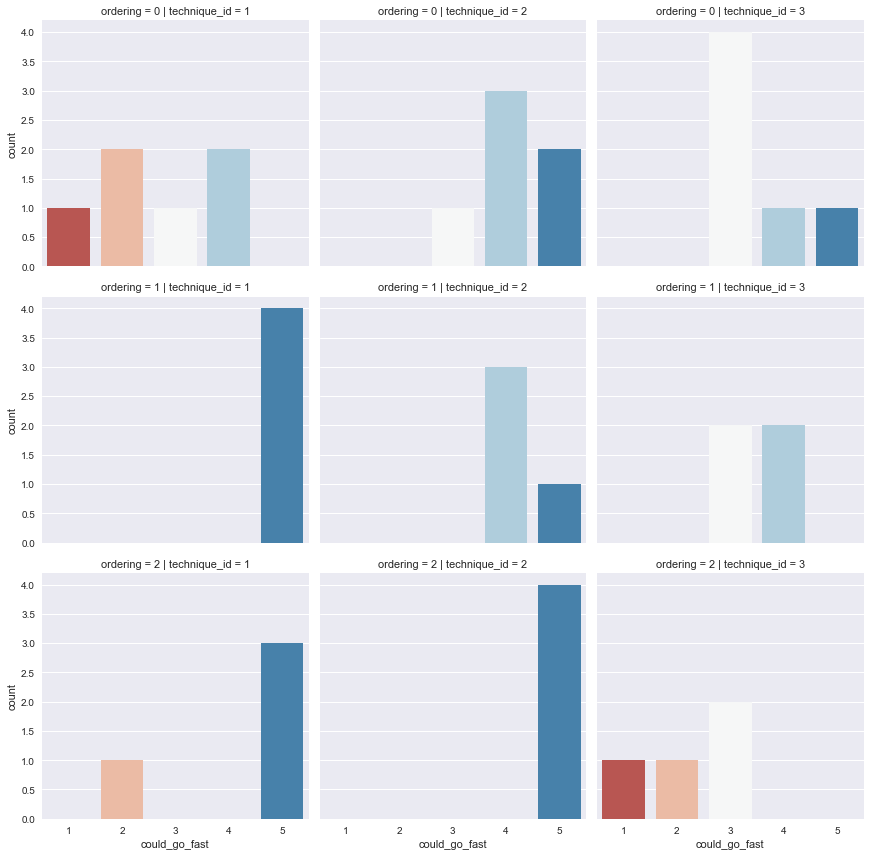

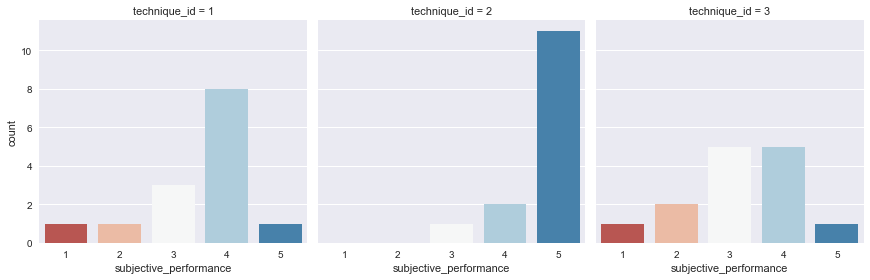

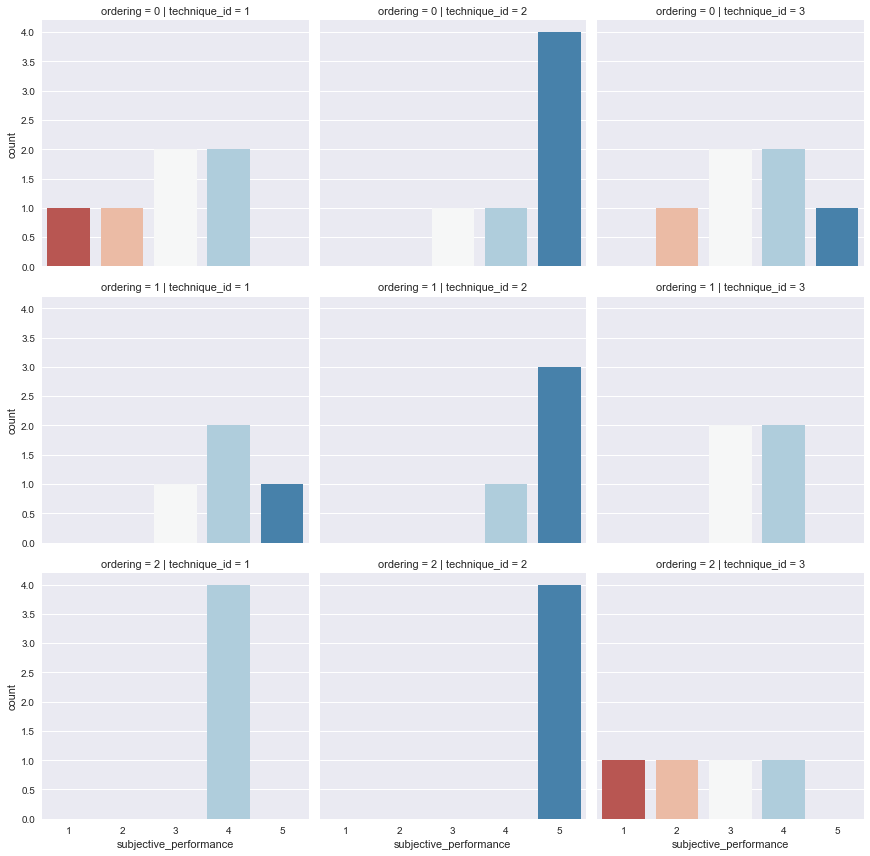

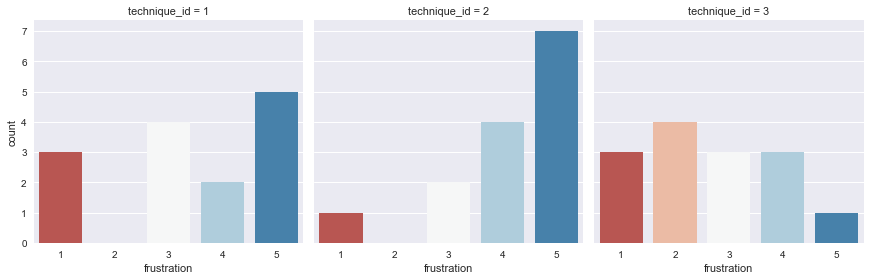

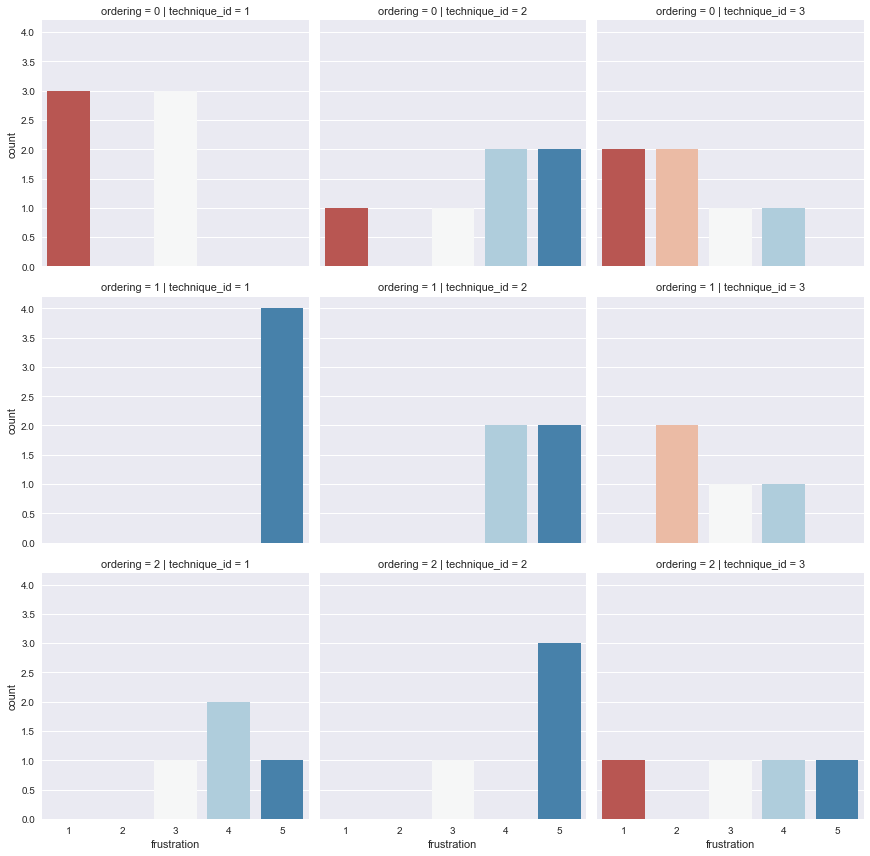

In [478]:
for rate_label in rate_labels:
    sns.factorplot(x=rate_label, col='technique_id', data=rates, kind='count', palette='RdBu')
    sns.factorplot(x=rate_label, col='technique_id', row='ordering', data=rates, kind='count', palette='RdBu')

People seems to most prefer the latest technique tested, and to least prefer the first technique tested:

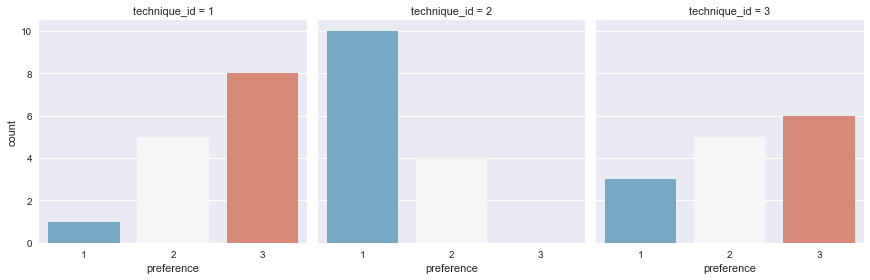

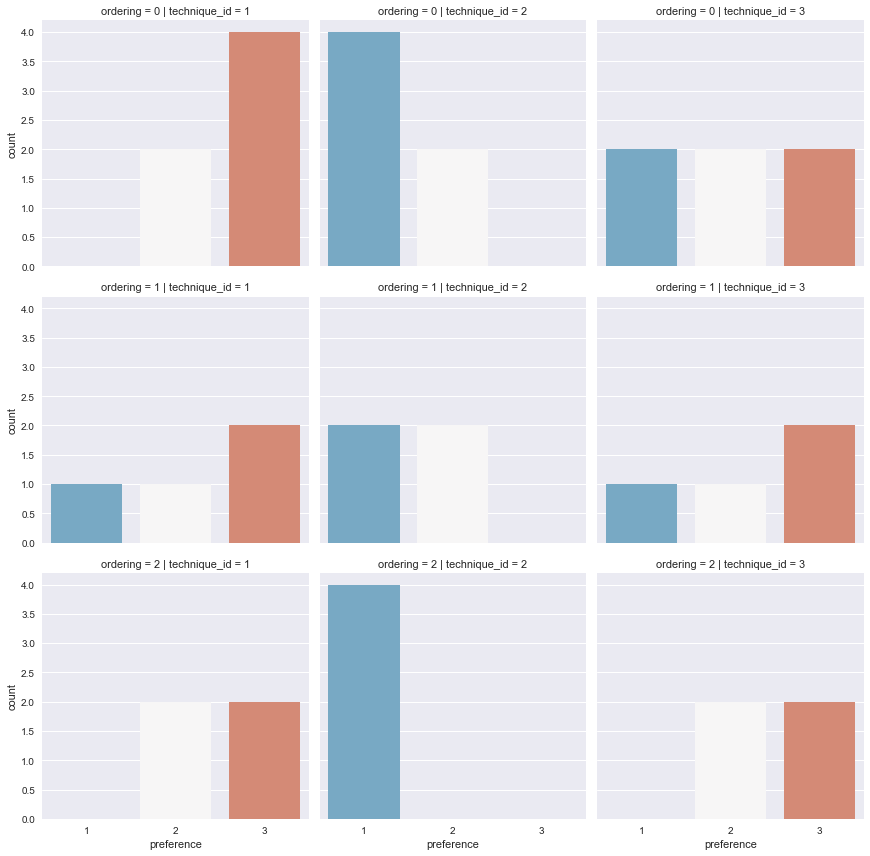

In [479]:
sns.factorplot(x='preference', col='technique_id', data=preferences, kind='count', palette='RdBu_r')
sns.factorplot(x='preference', col='technique_id', row='ordering', data=preferences, kind='count', palette='RdBu_r')